### A figure summarizing our results. We will plot 1024 / default for a bunch of graphs.

In [1]:
include("../src/Julia.jl")

parseCPPData (generic function with 1 method)

In [2]:
graphs = ["grid2_10000_iu1000", 
    "grid3_27000_iu1000", 
    "pathDisjoint_1000_exp20", 
    "rand_1000_iu1000",
    "rand_1000_u1000",
    "randdense_1000_iu1000",
    "randdense_1000_u1000"]
ipmGraphs = ["ipm_grid3_8000_10",
    "ipm_grid3_8000_20",
    "ipm_grid3_8000_50",
    "ipm_grid3_8000_70"]

4-element Array{ASCIIString,1}:
 "ipm_grid3_8000_10"
 "ipm_grid3_8000_20"
 "ipm_grid3_8000_50"
 "ipm_grid3_8000_70"

In [3]:
n = length(graphs)
iterCnt = 100

100

In [4]:
graphDir = "../../graphs/"
ipmDir = "../../graphs/ipm_grid3_8000_all/"

"../../graphs/ipm_grid3_8000_all/"

In [5]:
data2 = []
dataA = []
name = []

for graph in graphs
    allFiles = readdir(graphDir * graph)
    
    nameDefault = ""
    name1024 = ""
    
    if "tree1.mtx" in allFiles
        nameDefault = graphDir * graph * "/_log_julia_tree1_default.txt"
        name1024 = graphDir * graph * "/_log_julia_tree1_1024.txt"
    else
        # pathDisjoint_1000_exp20
        nameDefault = graphDir * graph * "/_log_julia_default.txt"
        name1024 = graphDir * graph * "/_log_julia_1024.txt"
#         continue
    end
    
    jul64 = parseData(nameDefault)[1:iterCnt]
    jul1024= parseData(name1024)[1:iterCnt]
    
    res2 = Array{Float64,1}(0)
    resA = Array{Float64,1}(0)
    for i in 1:iterCnt
        push!(res2, jul1024[i][2] / jul64[i][2])
        push!(resA, jul1024[i][1] / jul64[i][1])
    end
    
    for i in 2:iterCnt
        res2[i] = min(res2[i], res2[i-1])
        resA[i] = min(resA[i], resA[i-1])
    end
    
    push!(data2, res2)
    push!(dataA, resA)
    push!(name, graph)
end

for graph in ipmGraphs
    nameDefault = ipmDir * graph * "/_log_julia_tree1_default.txt"
    name1024 = ipmDir * graph * "/_log_julia_tree1_1024.txt"
    
    jul64 = parseData(nameDefault)[1:100]
    jul1024= parseData(name1024)[1:100]
    
    res2 = Array{Float64,1}(0)
    resA = Array{Float64,1}(0)
    for i in 1:iterCnt
        if i <= 100
            push!(res2, jul1024[i][2] / jul64[i][2])
            push!(resA, jul1024[i][1] / jul64[i][1])
        else
            push!(res2, jul1024[100][2] / jul64[100][2])
            push!(resA, jul1024[100][1] / jul64[100][1])
        end
    end
    
    for i in 2:iterCnt
        res2[i] = min(res2[i], res2[i-1])
        resA[i] = min(resA[i], resA[i-1])
    end
    
    push!(data2, res2)
    push!(dataA, resA)
    push!(name, graph)
end

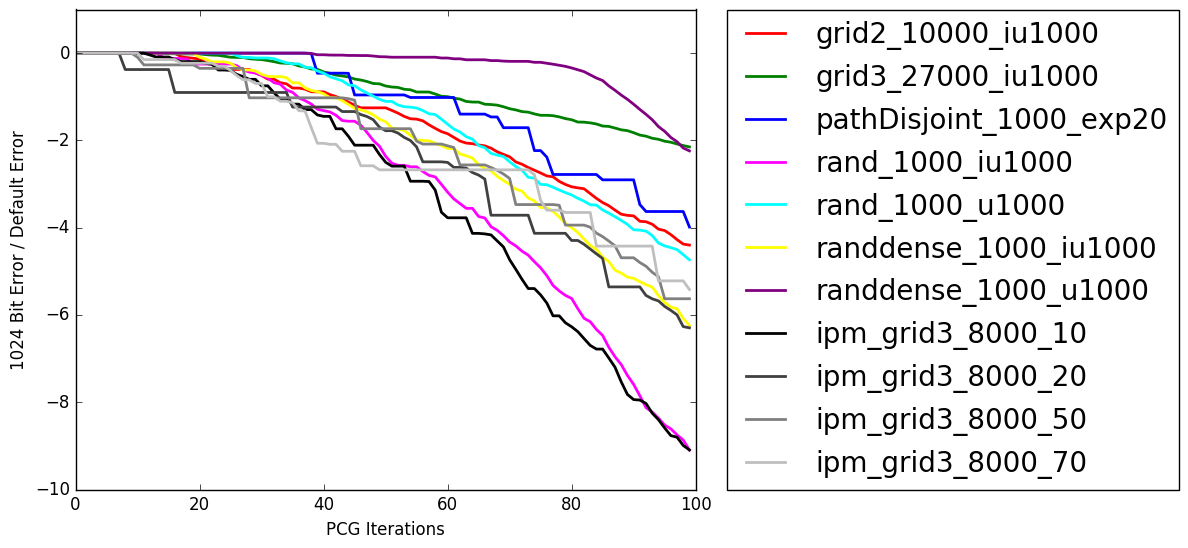

PyObject <matplotlib.text.Text object at 0x309e9f1d0>

In [6]:
total = length(graphs)+length(ipmGraphs)

colors = ["red", "green", "blue", "magenta", "cyan", "yellow", "purple"]

for i in 1:total
    if i <= length(graphs)
        plot(log(data2[i]), color = colors[i], label=name[i], linewidth=2)
    else
        plot(log(data2[i]), color = "$((i-8)/4)", label=name[i], linewidth=2)
    end
end

ax = gca()
ax[:set_ylim]([-10,1])

legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
ylabel("1024 Bit Error / Default Error")
xlabel("PCG Iterations")